# Many-Valued Modal Tableau (mvmt) Demo

This notebook illustrates some of the use cases of the [mvmt](https://github.com/WeAreDevo/Many-Valued-Modal-Tableau) package

In [1]:
%matplotlib inline
! pip install mvmt

  Obtaining dependency information for mvmt from https://files.pythonhosted.org/packages/5e/8c/29024e06b1d8c5b3b8b590d73ce9ccb0966318ca9d5e00d4a3d98a961cb9/mvmt-0.0.5-py3-none-any.whl.metadata


In [2]:
from mvmt import tableau, algebra, utils
from PrettyPrint import PrettyPrintTree


In [3]:
heyting_algebra = {
    "elements": ["0", "a", "b", "1"],
    "order": {"0": ["0", "a", "b", "1"], "a": ["a", "1"], "b": ["b", "1"], "1": ["1"]},
}


In [4]:
expression = "(<>p & <>q) -> <>(p & q)"


(<>p & <>q) -> <>(p & q) is valid: False
                                                                                                                                                                                                                                                                  <A, set()> 
                                                                                                                                                                                                                                                                       │
                                                                                                                                                                                                                                                      F (1 -> ((<>p & <>q) -> <>(p & q))) 
                                                                                                                                     ┌───────

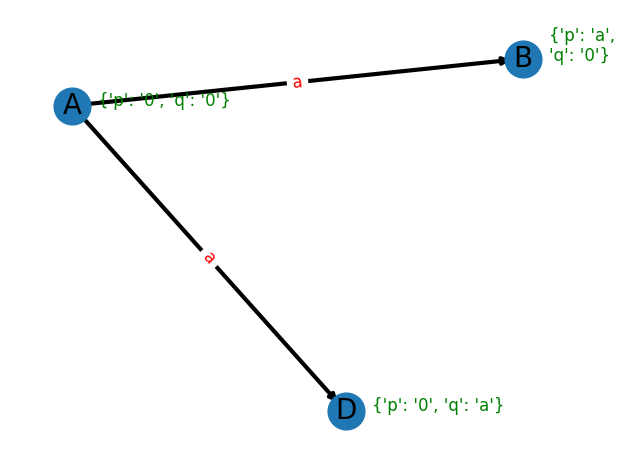

In [5]:
H = utils.construct_heyting_algebra(python_dict=heyting_algebra)

valid, tab = tableau.isValid(expression, H)

print(f"{expression} is valid: {valid}")
pt = PrettyPrintTree(
    lambda x: x.children,
    lambda x: str(x.signed_formula),
    lambda x: f"<{x.world}, {x.relation}>",
)
pt(tab.root)

if not valid:
    M = tableau.construct_counter_model(expression, H, tab)
    tableau.visualize_model(M)
